In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [11]:
# Load the data
file_path = 'C:/Users/shiva/Downloads/Nat_Gas.csv'  # Update with the correct file path
data = pd.read_csv(file_path, parse_dates=['Dates'], index_col='Dates')

C:\Users\shiva\AppData\Local\Temp\ipykernel_18628\2666517887.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Dates'], index_col='Dates')


In [9]:
import pandas as pd

# Load the first few rows to inspect the columns
file_path = 'C:/Users/shiva/Downloads/Nat_Gas.csv'
data = pd.read_csv(file_path)
print(data.head())


      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


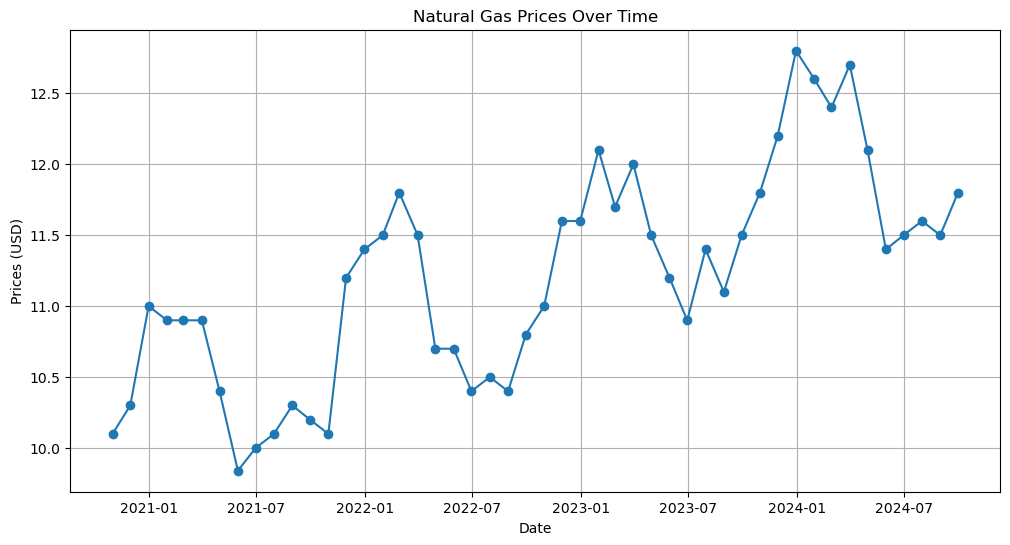

In [12]:
# Plot the data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Prices (USD)')
plt.grid(True)
plt.show()

In [13]:
# Extract year and month for trend analysis
data['Year'] = data.index.year
data['Month'] = data.index.month

In [17]:
# Calculate average price per month across all years
monthly_avg = data.groupby('Month')['Prices'].mean()
monthly_avg


Month
1     11.775
2     11.700
3     11.775
4     11.175
5     10.785
6     10.700
7     10.900
8     10.825
9     11.075
10    10.750
11    11.325
12    11.700
Name: Prices, dtype: float64

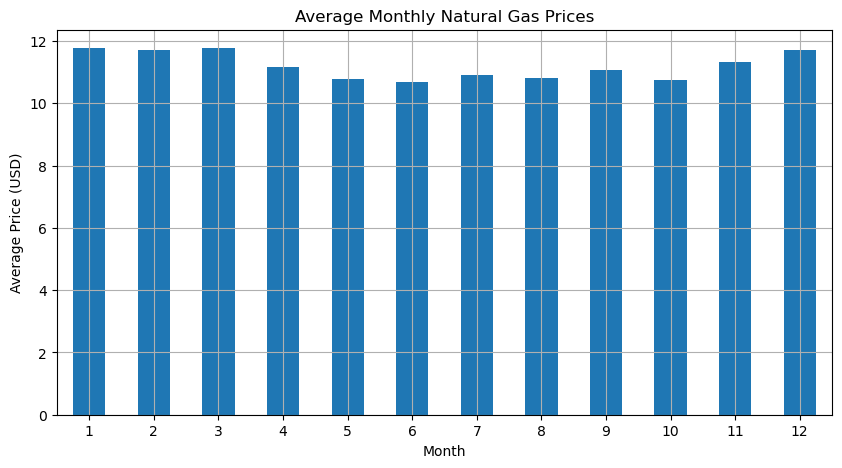

In [18]:
# Plot monthly average prices
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Natural Gas Prices')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [19]:
# Prepare data for linear regression model
# Convert dates to ordinal numbers for regression analysis
data['Date_ordinal'] = data.index.map(datetime.toordinal)
X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Prices'].values

In [20]:

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Function to estimate the price for any given date
def estimate_price(date):
    date_ordinal = datetime.strptime(date, '%Y-%m-%d').toordinal()
    estimated_price = model.predict([[date_ordinal]])[0]
    return estimated_price


In [23]:

# Extrapolate prices for the next year
dates_future = [data.index[-1] + timedelta(days=30*i) for i in range(1, 13)]
X_future = np.array([d.toordinal() for d in dates_future]).reshape(-1, 1)
prices_future = model.predict(X_future)

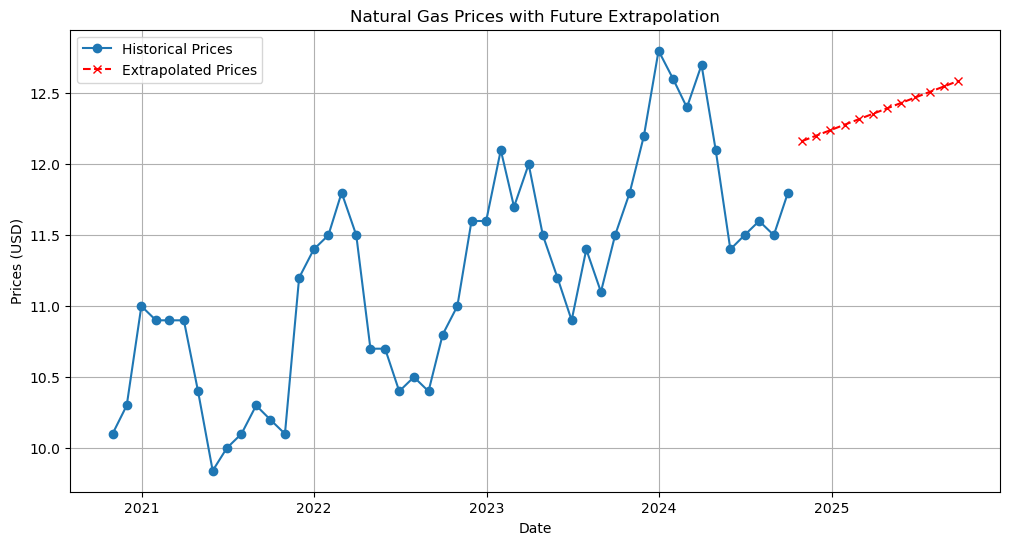

In [24]:

# Plot the extrapolated data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Prices'], marker='o', linestyle='-', label='Historical Prices')
plt.plot(dates_future, prices_future, marker='x', linestyle='--', color='red', label='Extrapolated Prices')
plt.title('Natural Gas Prices with Future Extrapolation')
plt.xlabel('Date')
plt.ylabel('Prices (USD)')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
# Example usage
print(f"Estimated price on 2025-01-15: ${estimate_price('2025-01-15'):.2f}")

Estimated price on 2025-01-15: $12.26
